### GPN's Brain Aging Prediction Data - Step01_structural_processing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data.datautils import get_first_batch, plot_batch

#### Setup Data

In [ ]:
data = rio.data.BrainAgingPredictionDataModule(
    root='/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies',
    data_dir='processed_data',
    step='step01_structural_processing',
    use_augmentation=False,
    use_preprocessing=False,
    batch_size=32,
    intensities=["T1", "FLAIR"],
    labels=[],
)
data.prepare_data()

In [9]:
data.setup()

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.


In [10]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 496 subjects.
Validation: 123 subjects.
Test: 155 subjects.


#### Get a Train and a Test Batch

In [11]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()
test_dataloader = data.test_dataloader()

In [12]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
test_batch = get_first_batch(test_dataloader)

In [13]:
print(f"Batch keys: {train_batch.keys()}")
print(f"Sample shape: {train_batch['T1']['data'].shape}")
print(f"Image keys: {train_batch['T1'].keys()}")
print(f"Subject IDs: {train_batch['subj_id']}")
print(f"Scan IDs: {train_batch['scan_id']}")

Batch keys: dict_keys(['subj_id', 'scan_id', 'T1', 'FLAIR'])
Sample shape: torch.Size([32, 1, 160, 192, 160])
Image keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])
Subject IDs: ['ABD_IH_0046', 'ABD_IH_0095', 'ABD_IH_0017', 'ABD_AJ_0146', 'ABD_AJ_0130', 'ABD_SW_0147', 'ABD_SS_0106', 'ABD_SW_0099', 'ABD_SW_0060', 'ABD_AJ_0046', 'ABD_SS_0041', 'ABD_IH_0007', 'ABD_BS_0009', 'ABD_SW_0010', 'ABD_IH_0036', 'ABD_AJ_0064', 'ABD_AJ_0020', 'ABD_AJ_0098', 'ABD_IH_0006', 'ABD_CN_0009', 'ABD_SS_0078', 'ABD_SS_0037', 'ABD_IH_0068', 'ABD_SW_0053', 'ABD_SW_0122', 'ABD_AJ_0201', 'ABD_AJ_0091', 'ABD_SW_0035', 'ABD_SS_0025', 'ABD_SW_0015', 'ABD_SW_0096', 'ABD_AJ_0057']
Scan IDs: ['scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 

#### Plot Example Train and Test Data

Subject: 0


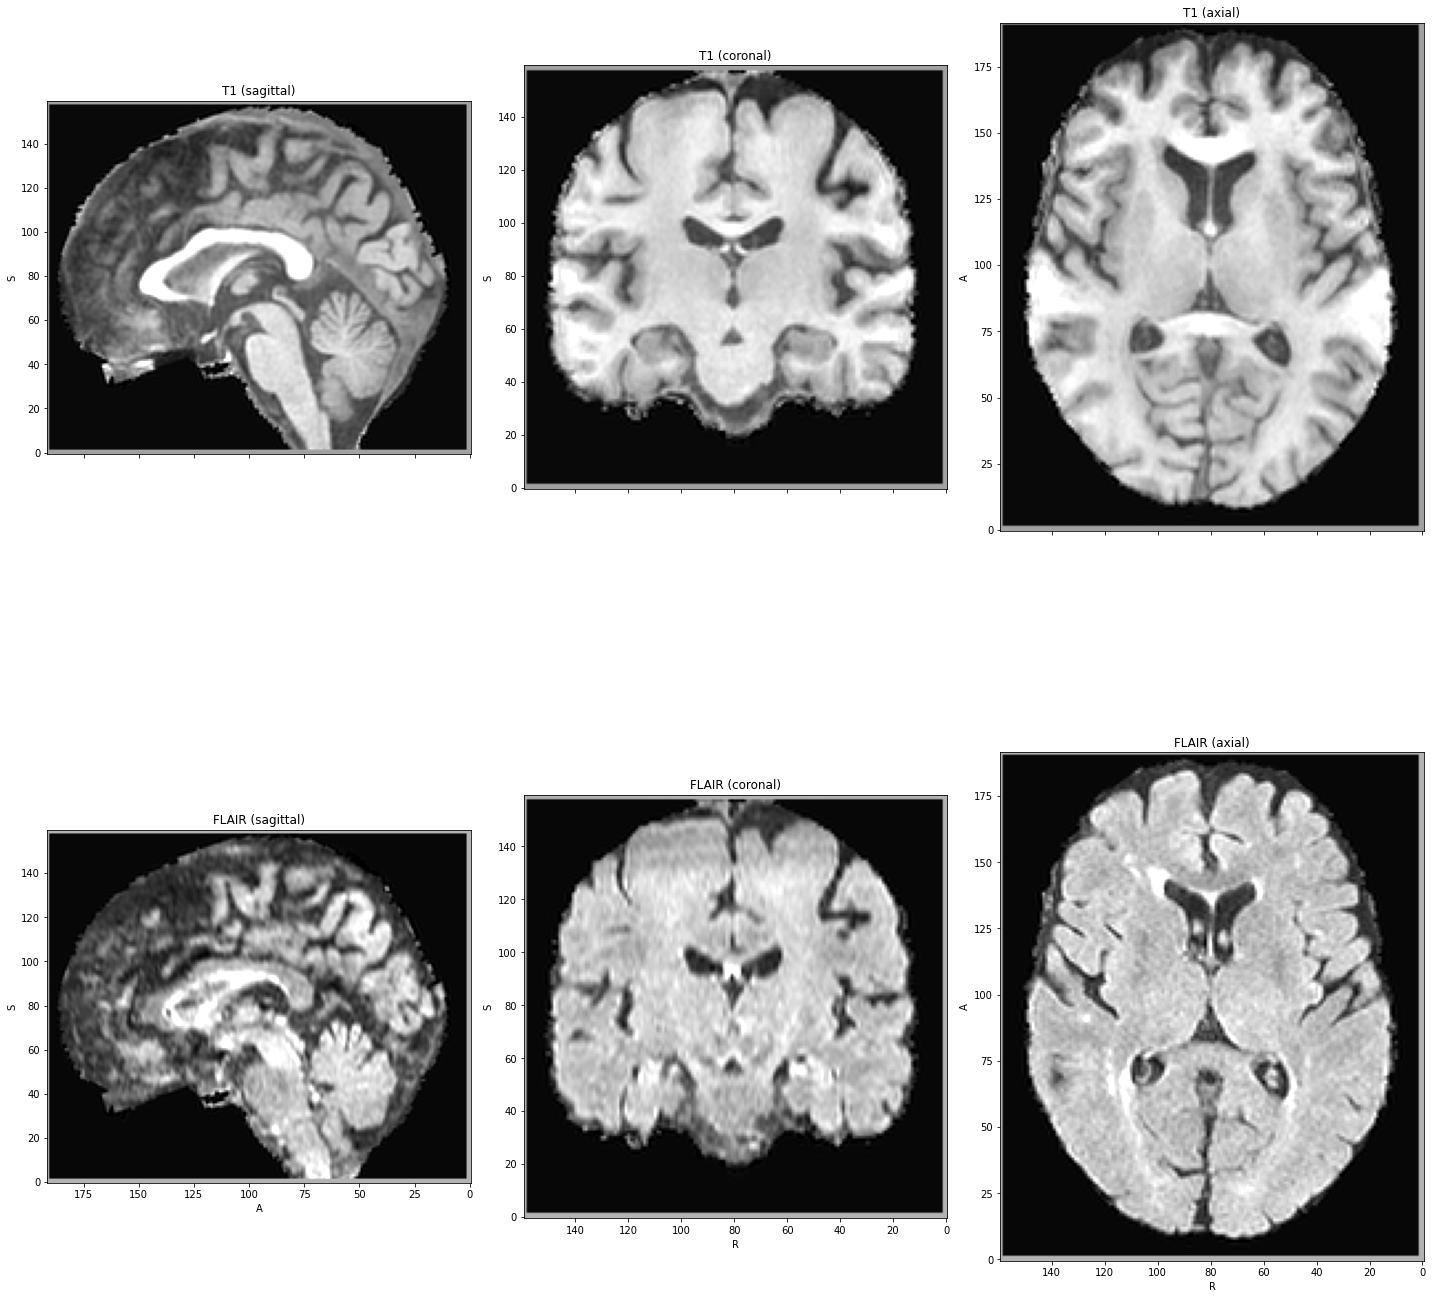



Subject: 1


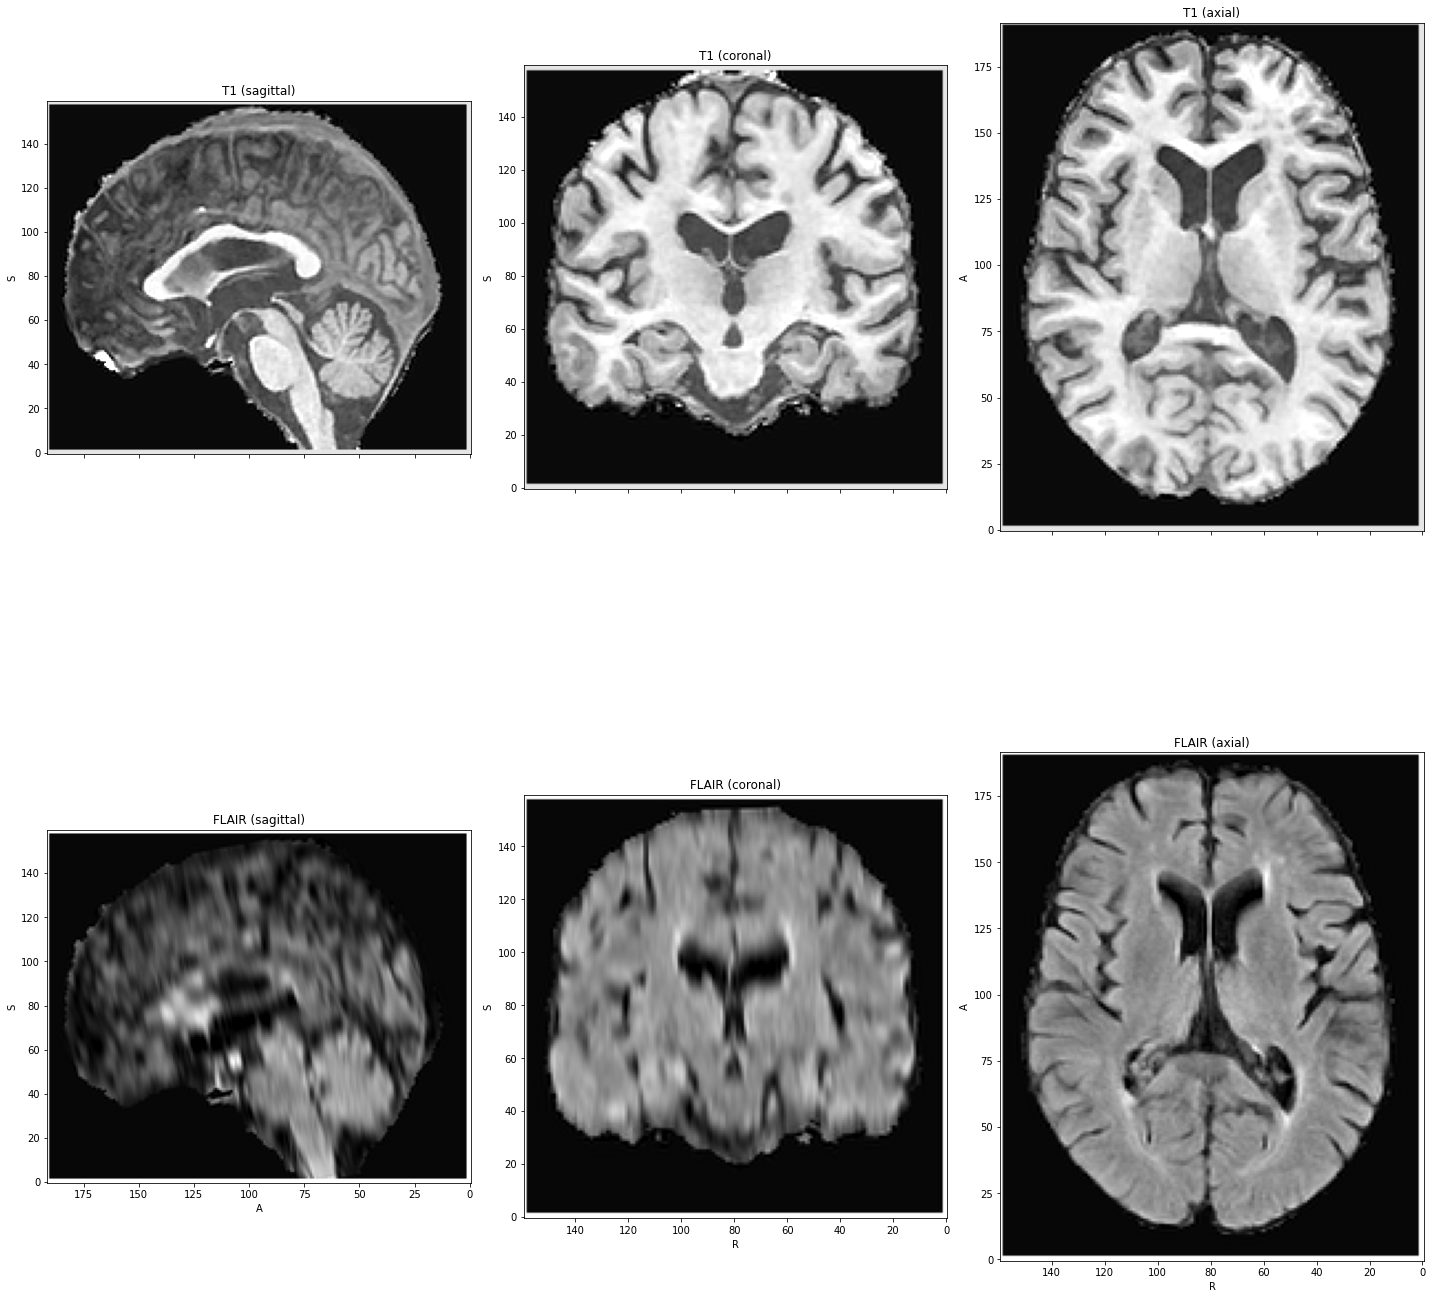



Subject: 2


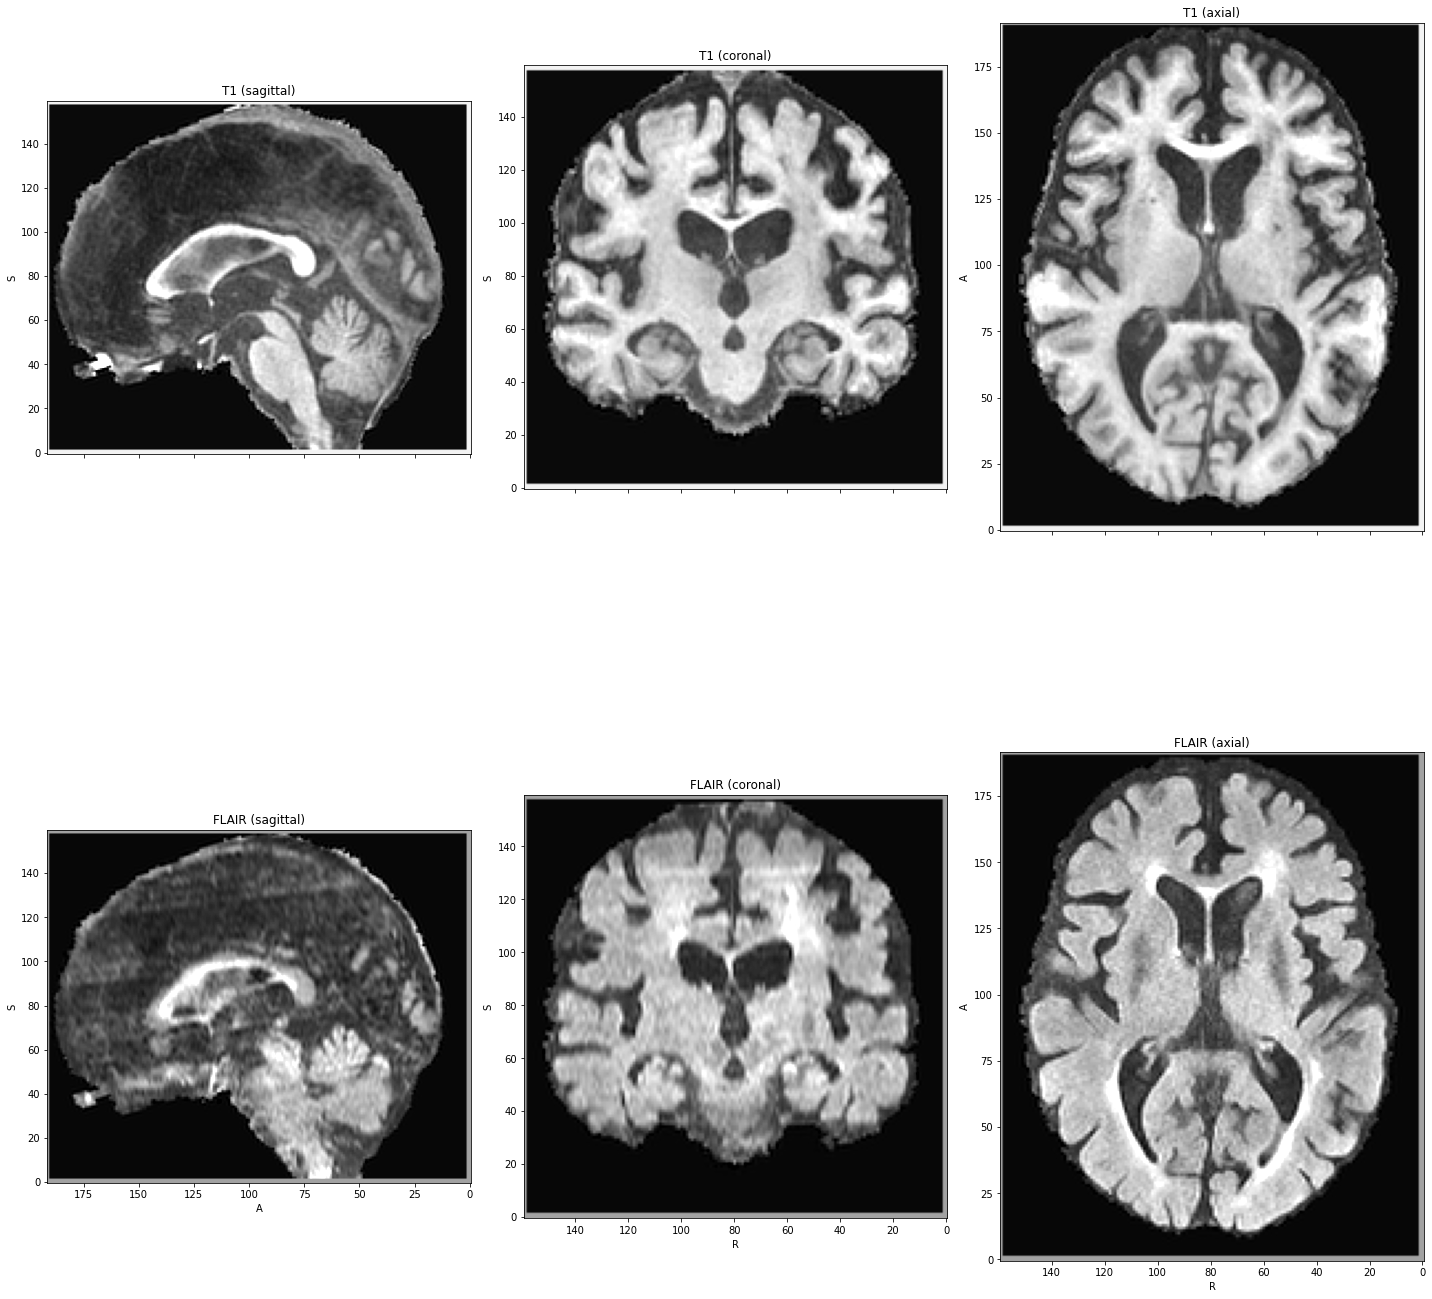



Subject: 3


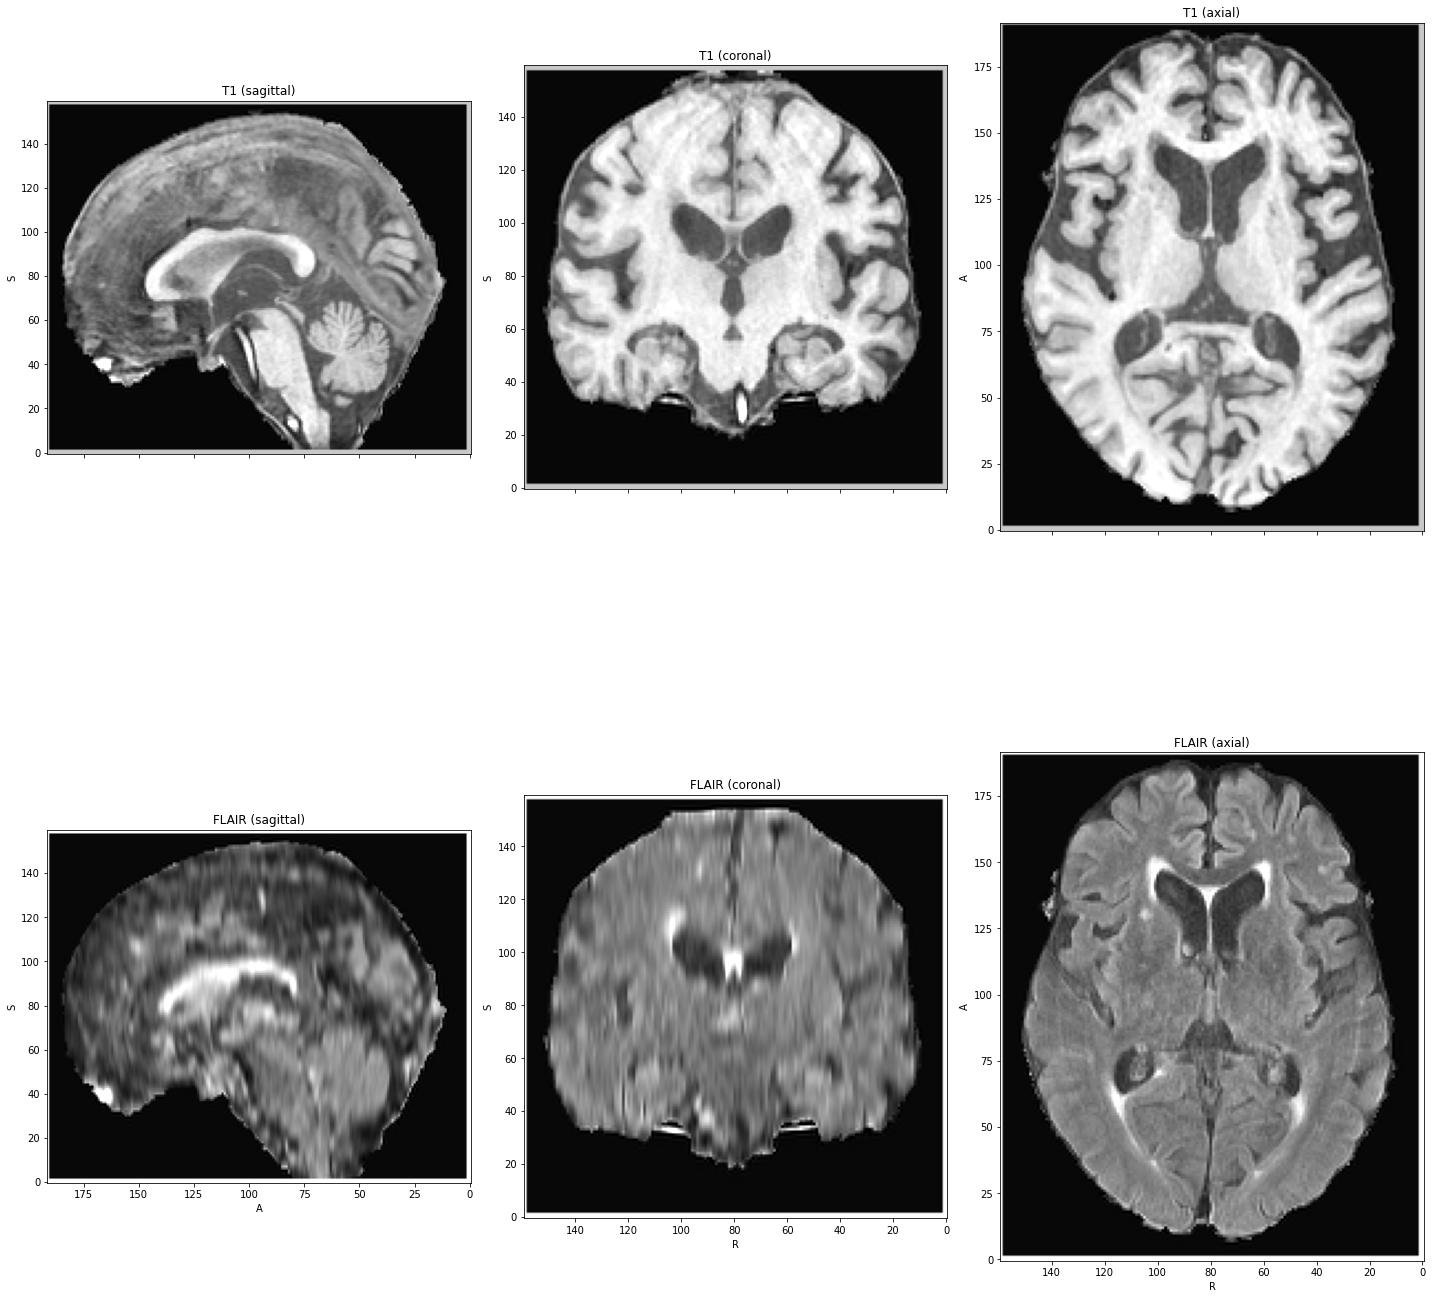

In [14]:
plot_batch(train_batch)

Subject: 0


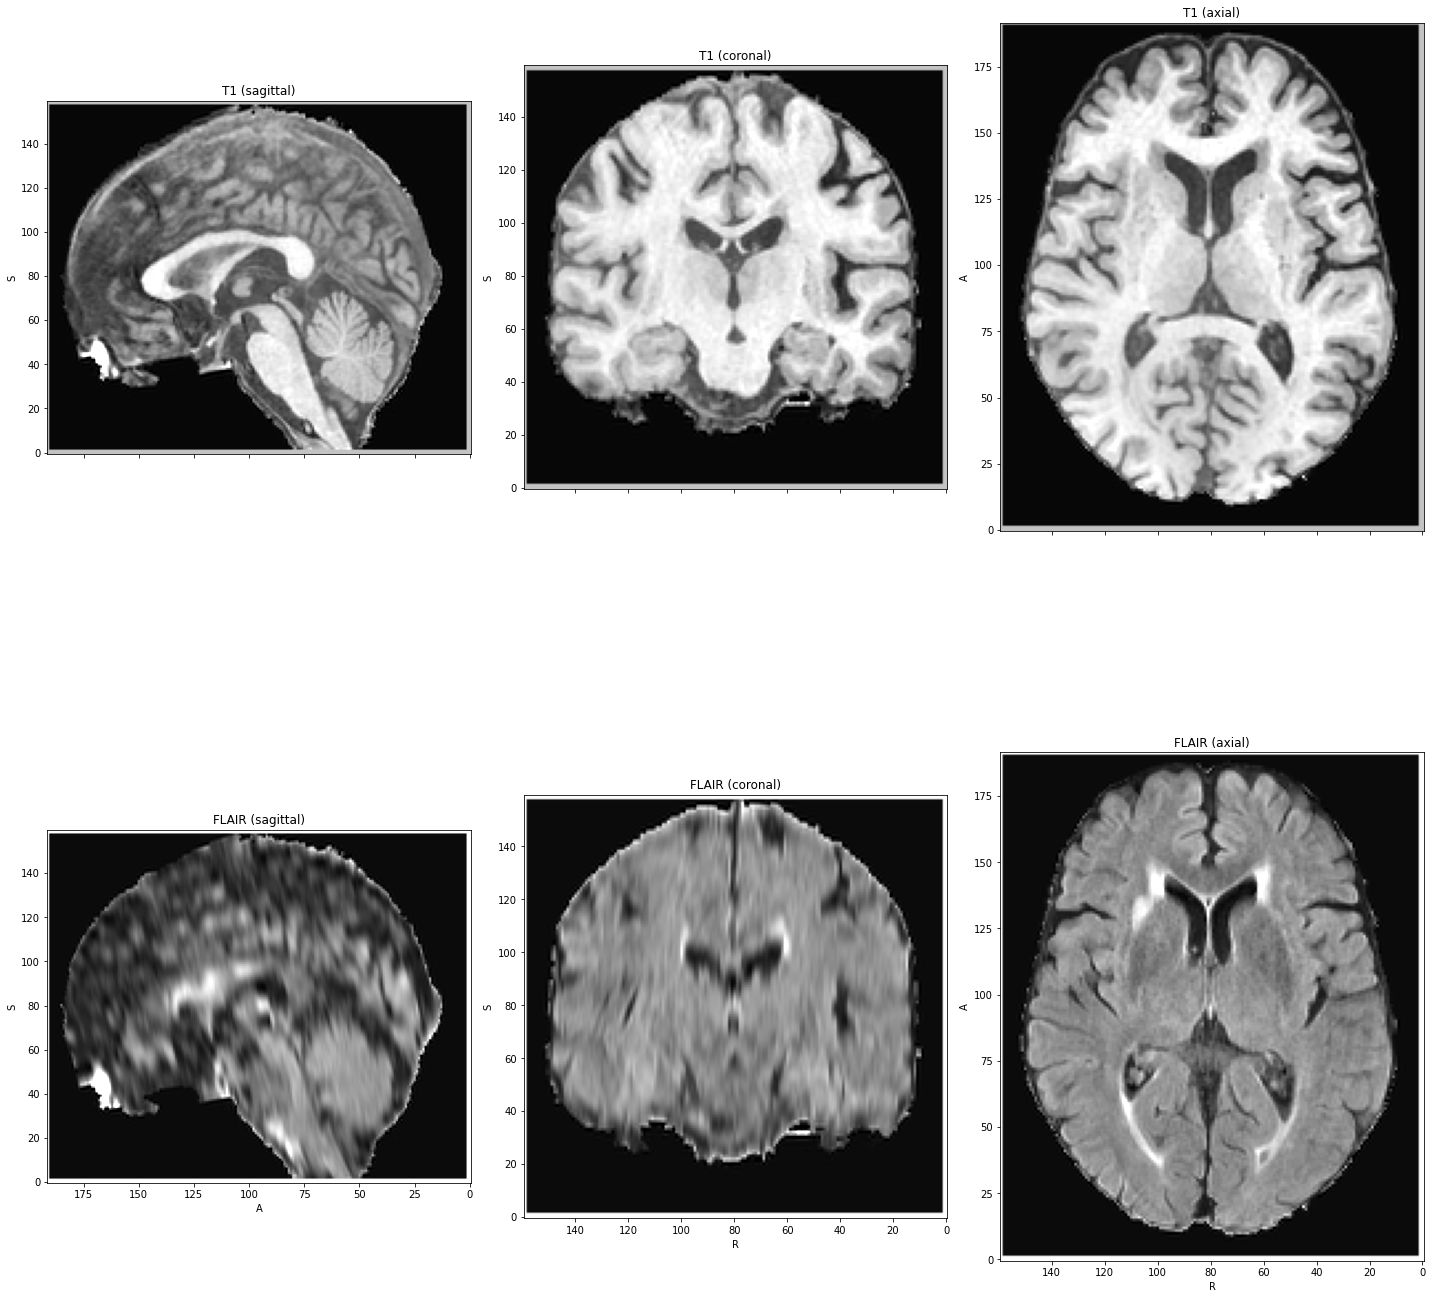



Subject: 1


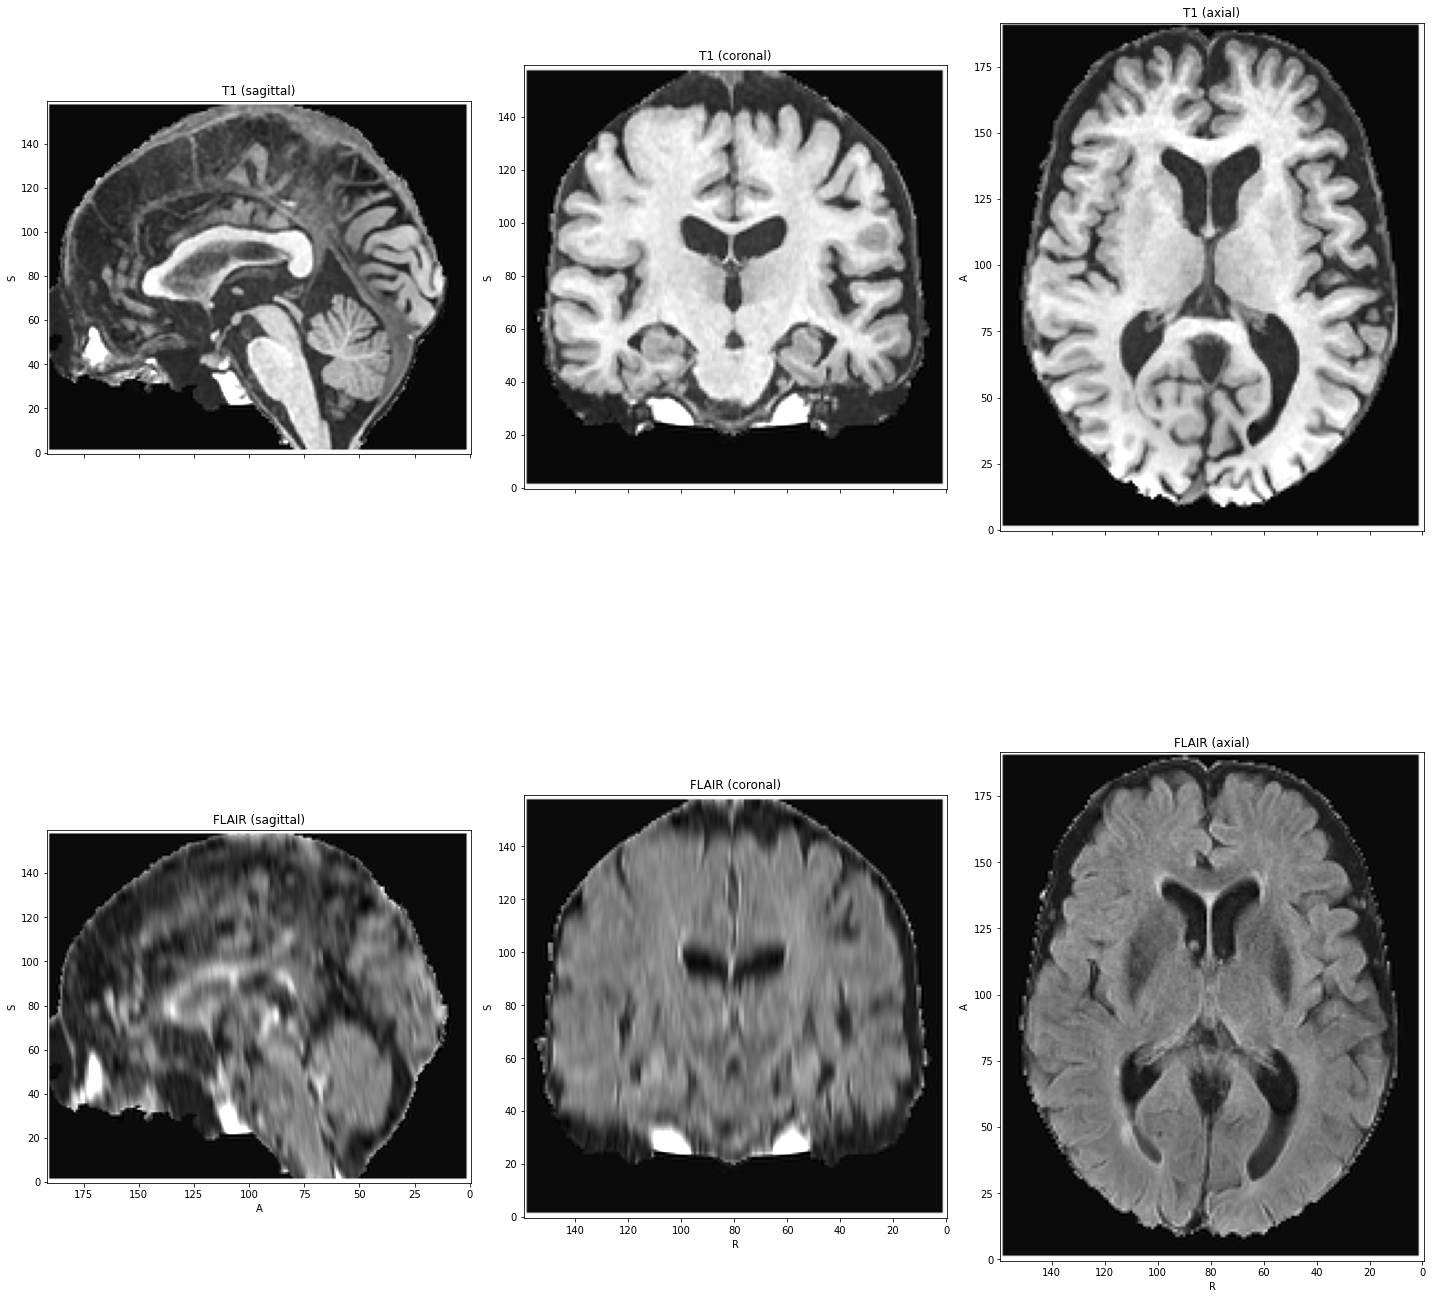



Subject: 2




Subject: 3


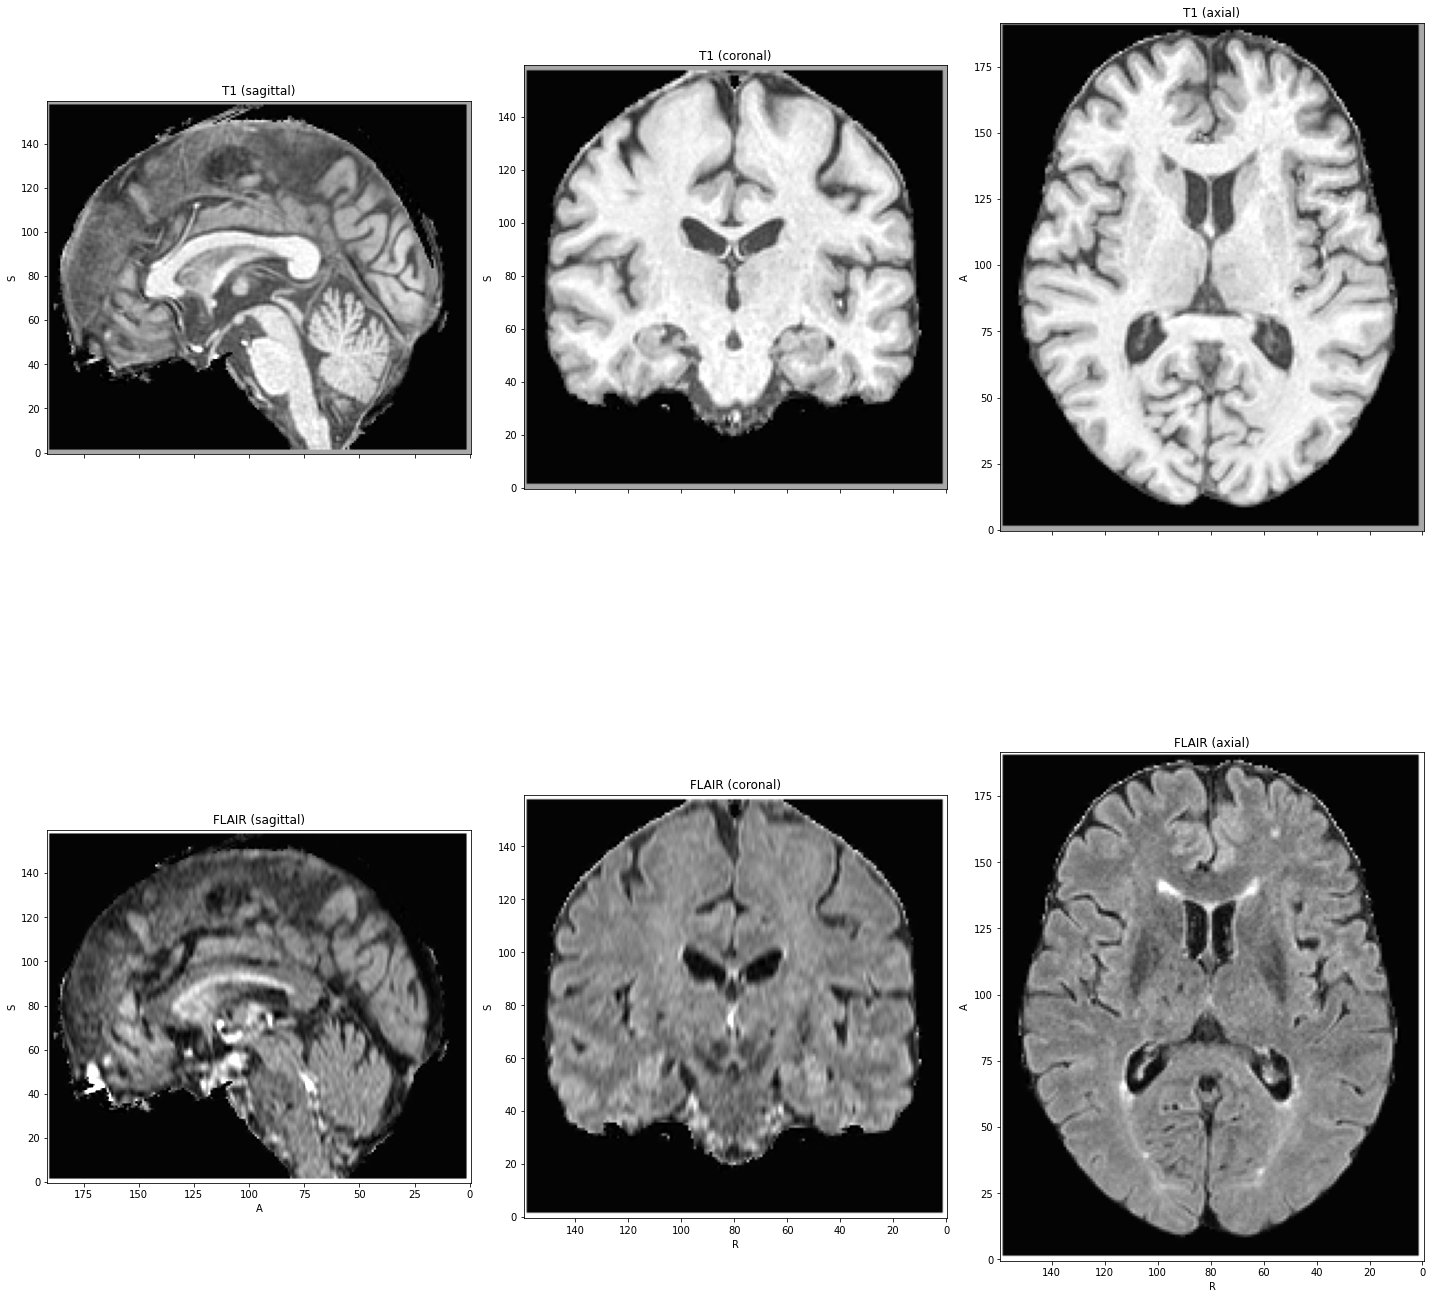

In [15]:
plot_batch(test_batch)